Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import os
import json
import requests as re

In [2]:
with open('yelp_all', 'r') as e: 
    data = json.load(e)
df_yelp_all = pd.DataFrame(data)
df_yelp_all

,coordinates,num_restaurant,num_entertainment,num_playground
0,"{'coordinates': '51.52916347,-0.109970527'}",50,47,1
1,"{'coordinates': '51.49960695,-0.197574246'}",50,18,1
2,"{'coordinates': '51.52128377,-0.084605692'}",50,50,1
3,"{'coordinates': '51.52395143,-0.122502346'}",50,50,2
4,"{'coordinates': '51.52168078,-0.130431727'}",50,50,2
...,...,...,...,...
540,"{'coordinates': '51.46663393,-0.169821175'}",50,6,2
541,"{'coordinates': '51.516204,-0.155525'}",50,50,1
542,"{'coordinates': '51.517703,-0.154106'}",50,50,1
543,"{'coordinates': '51.52364804,-0.074754872'}",50,50,1


In [3]:
import re
df_yelp_all[['A','B']] = df_yelp_all['coordinates'].str.split(":", 1, expand=True) 
pattern = r"[{}']"
df_yelp_all["B"] = df_yelp_all["B"].apply(lambda x: re.sub(pattern, '', x))
df_yelp_all = df_yelp_all.drop(['coordinates','A'],axis = 1)


In [15]:
df_yelp_all[['lat','long']] = df_yelp_all['coordinates'].str.split(",", 1, expand=True) 
df_yelp_all

,num_restaurant,num_entertainment,num_playground,coordinates,lat,long
0,50,47,1,"51.52916347,-0.109970527",51.52916347,-0.109970527
1,50,18,1,"51.49960695,-0.197574246",51.49960695,-0.197574246
2,50,50,1,"51.52128377,-0.084605692",51.52128377,-0.084605692
3,50,50,2,"51.52395143,-0.122502346",51.52395143,-0.122502346
4,50,50,2,"51.52168078,-0.130431727",51.52168078,-0.130431727
...,...,...,...,...,...,...
540,50,6,2,"51.46663393,-0.169821175",51.46663393,-0.169821175
541,50,50,1,"51.516204,-0.155525",51.516204,-0.155525
542,50,50,1,"51.517703,-0.154106",51.517703,-0.154106
543,50,50,1,"51.52364804,-0.074754872",51.52364804,-0.074754872


In [16]:
df_yelp_all = df_yelp_all.rename(columns={'B':'coordinates'})
df_yelp_all

,num_restaurant,num_entertainment,num_playground,coordinates,lat,long
0,50,47,1,"51.52916347,-0.109970527",51.52916347,-0.109970527
1,50,18,1,"51.49960695,-0.197574246",51.49960695,-0.197574246
2,50,50,1,"51.52128377,-0.084605692",51.52128377,-0.084605692
3,50,50,2,"51.52395143,-0.122502346",51.52395143,-0.122502346
4,50,50,2,"51.52168078,-0.130431727",51.52168078,-0.130431727
...,...,...,...,...,...,...
540,50,6,2,"51.46663393,-0.169821175",51.46663393,-0.169821175
541,50,50,1,"51.516204,-0.155525",51.516204,-0.155525
542,50,50,1,"51.517703,-0.154106",51.517703,-0.154106
543,50,50,1,"51.52364804,-0.074754872",51.52364804,-0.074754872


In [7]:
with open('citybike', 'r') as g: 
    data = json.load(g)
df_all_stations = pd.DataFrame(data)

In [9]:
df_all_stations[['lat','long']] = df_all_stations['coordinates'].str.split(",", 1, expand=True)
df_all_stations

,name,coordinates,bikes,lat,long
0,"001023 - River Street , Clerkenwell","51.52916347,-0.109970527",12,51.52916347,-0.109970527
1,"001018 - Phillimore Gardens, Kensington","51.49960695,-0.197574246",31,51.49960695,-0.197574246
2,"001012 - Christopher Street, Liverpool Street","51.52128377,-0.084605692",4,51.52128377,-0.084605692
3,"001024 - Park Street, Bankside","51.50597426,-0.092754157",10,51.50597426,-0.092754157
4,"001022 - Brunswick Square, Bloomsbury","51.52395143,-0.122502346",16,51.52395143,-0.122502346
...,...,...,...,...,...
794,"200008 - Portman Square, Marylebone","51.516204,-0.155525",3,51.516204,-0.155525
795,"001225 - George Street, Marylebone","51.517703,-0.154106",25,51.517703,-0.154106
796,"000973 - Bethnal Green Road, Shoreditch","51.52364804,-0.074754872",20,51.52364804,-0.074754872
797,"002677 - Natural History Museum, South Kensington","51.49559291,-0.179077626",9,51.49559291,-0.179077626


In [13]:
df_all_stations['lat'] = df_all_stations['lat'].str.strip()
df_all_stations['long'] = df_all_stations['long'].str.strip()


In [18]:
df_yelp_all['lat'] = df_yelp_all['lat'].str.strip()
df_yelp_all['long'] = df_yelp_all['long'].str.strip()

In [19]:
df_final = pd.merge(df_yelp_all, df_all_stations, on=['lat','long'],how='left')
df_final = df_final.drop(['coordinates_x','coordinates_y'],axis = 1)
df_final

df_final.to_json('df_final', orient = 'records')

,num_restaurant,num_entertainment,num_playground,lat,long,name,bikes
0,50,47,1,51.52916347,-0.109970527,"001023 - River Street , Clerkenwell",12
1,50,18,1,51.49960695,-0.197574246,"001018 - Phillimore Gardens, Kensington",31
2,50,50,1,51.52128377,-0.084605692,"001012 - Christopher Street, Liverpool Street",4
3,50,50,2,51.52395143,-0.122502346,"001022 - Brunswick Square, Bloomsbury",16
4,50,50,2,51.52168078,-0.130431727,"000980 - Malet Street, Bloomsbury",8
...,...,...,...,...,...,...,...
540,50,6,2,51.46663393,-0.169821175,"300014 - Falcon Road, Clapham Junction",28
541,50,50,1,51.516204,-0.155525,"200008 - Portman Square, Marylebone",3
542,50,50,1,51.517703,-0.154106,"001225 - George Street, Marylebone",25
543,50,50,1,51.52364804,-0.074754872,"000973 - Bethnal Green Road, Shoreditch",20


In [30]:
df_final.to_json('df_final', orient = 'records')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [20]:

df_final.corr()

,num_restaurant,num_entertainment,num_playground,bikes
num_restaurant,1.000000,0.336341,0.082603,-0.045046
num_entertainment,0.336341,1.000000,0.121029,-0.181587
num_playground,0.082603,0.121029,1.000000,-0.070943
bikes,-0.045046,-0.181587,-0.070943,1.000000


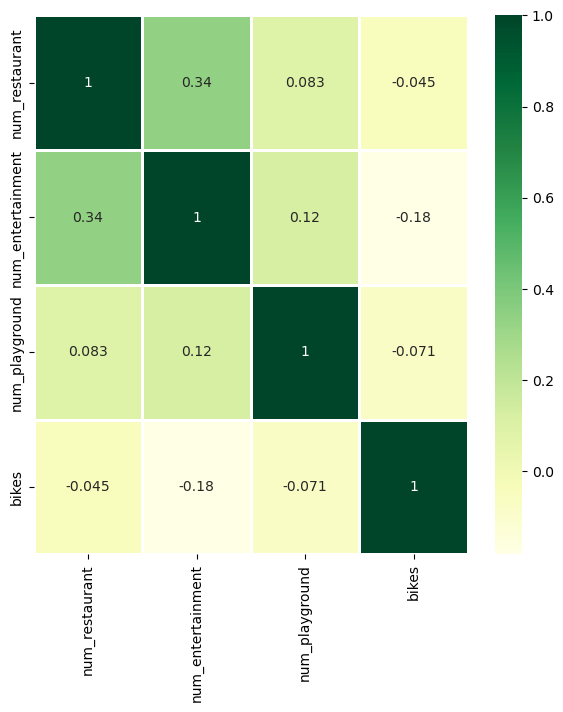

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
ax= sns.heatmap(df_final.corr(), annot = True, cmap="YlGn",linewidth =1)

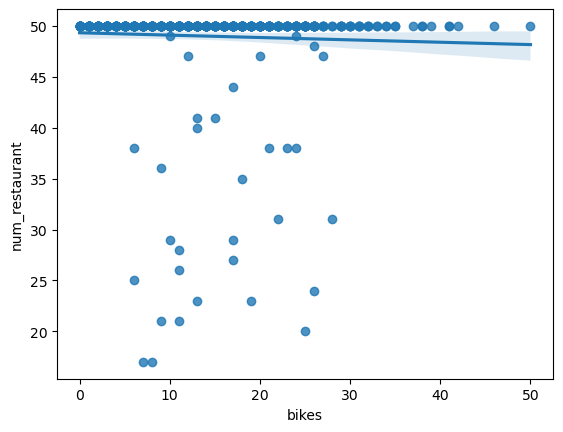

In [26]:
sns.regplot(x='bikes',y='num_restaurant', data= df_final)
plt.show()

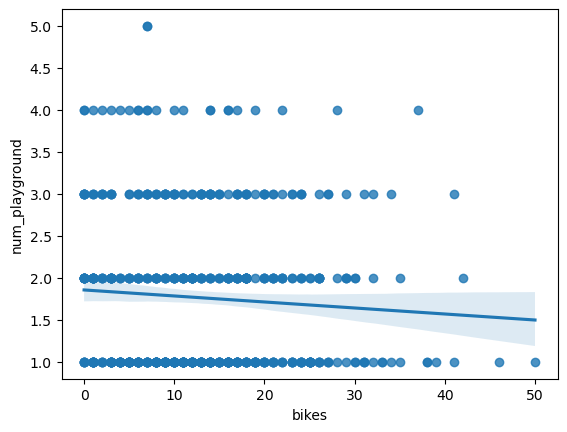

In [27]:
sns.regplot(x='bikes',y='num_playground', data= df_final)
plt.show()

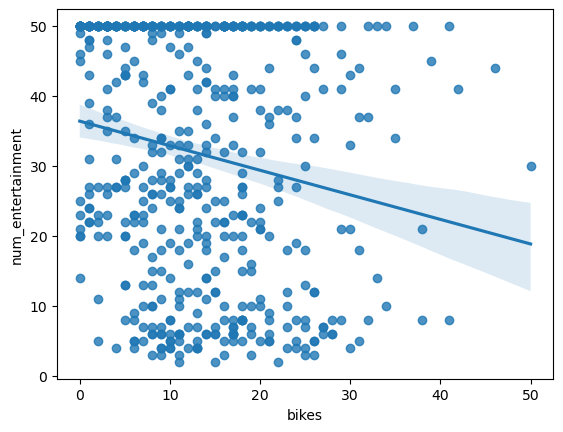

In [28]:
sns.regplot(x='bikes',y='num_entertainment', data= df_final)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [22]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [23]:
connection = create_connection("E:\LHL\WEEK3\Statistical-Modelling-Project\df_final.sqlite")
conn = sqlite3.connect("E:\LHL\WEEK3\Statistical-Modelling-Project\df_final.sqlite")
df_final.to_sql("df_final_data", conn, if_exists='replace')


Connection to SQLite DB successful


545

Look at the data before and after the join to validate your data.

In [24]:
df_all = pd.read_sql("""SELECT * FROM df_final_data """, conn)
df_all

,index,num_restaurant,num_entertainment,num_playground,lat,long,name,bikes
0,0,50,47,1,51.52916347,-0.109970527,"001023 - River Street , Clerkenwell",12
1,1,50,18,1,51.49960695,-0.197574246,"001018 - Phillimore Gardens, Kensington",31
2,2,50,50,1,51.52128377,-0.084605692,"001012 - Christopher Street, Liverpool Street",4
3,3,50,50,2,51.52395143,-0.122502346,"001022 - Brunswick Square, Bloomsbury",16
4,4,50,50,2,51.52168078,-0.130431727,"000980 - Malet Street, Bloomsbury",8
...,...,...,...,...,...,...,...,...
540,540,50,6,2,51.46663393,-0.169821175,"300014 - Falcon Road, Clapham Junction",28
541,541,50,50,1,51.516204,-0.155525,"200008 - Portman Square, Marylebone",3
542,542,50,50,1,51.517703,-0.154106,"001225 - George Street, Marylebone",25
543,543,50,50,1,51.52364804,-0.074754872,"000973 - Bethnal Green Road, Shoreditch",20
